<a href="https://colab.research.google.com/github/Adesoktav/Data-Analyst-Project/blob/main/Data%20Visualization-Biscuit%20Sales%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1: Data loading and Data preparation

In [ ]:
#data loading
import pandas as pd
df=pd.read_csv('Biscuit_sales.csv', delimiter=';')
df.head()

,transaction_date,buyer_name,buyer_location,buyer_birthdate,buyer_age,payment_method,quantity_purchased,product_code,sales_representative,gender,brand_name,unit_price,cost
0,20/02/2024,Allen Santos,San Jose,23/10/1954,69,Credit Card,129,Pro04,Travis Doyle,Male,Cinnamon Swirls,14,10
1,15/03/2024,Brenda Shaw,San Jose,05/05/1980,43,Cash,370,Pro09,Joseph Hill,Female,Shortbread,45,10
2,09/05/2024,Alexander Smith,San Jose,16/09/1945,78,Debit Card,90,Pro05,Elizabeth Guerrero,Male,Ginger Snaps,28,14
3,20/05/2024,Mary Rodriguez,Philadelphia,19/11/1953,70,Cash,475,Pro04,Tracy Lee,Female,Cinnamon Swirls,14,10
4,17/03/2024,Clinton Haynes,San Antonio,03/03/2001,23,Cash,346,Pro01,Sara Robertson,Male,Butter Crunch,11,10


In [ ]:
#data type checking
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11269 entries, 0 to 11268
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   transaction_date      11269 non-null  object
 1   buyer_name            11269 non-null  object
 2   buyer_location        11269 non-null  object
 3   buyer_birthdate       11269 non-null  object
 4   buyer_age             11269 non-null  int64 
 5   payment_method        11269 non-null  object
 6   quantity_purchased    11269 non-null  int64 
 7   product_code          11269 non-null  object
 8   sales_representative  11269 non-null  object
 9   gender                11269 non-null  object
 10  brand_name            11269 non-null  object
 11  unit_price            11269 non-null  int64 
 12  cost                  11269 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


in the output of df.info(), clearly see that transaction_data data tye is object and next step we would like to change to datetime data type


In [ ]:
##The transaction_date column is stored as an object type, so I converted it to datetime to enable time-based analysis
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%d/%m/%Y', errors='coerce')
df.head()

,transaction_date,buyer_name,buyer_location,buyer_birthdate,buyer_age,payment_method,quantity_purchased,product_code,sales_representative,gender,brand_name,unit_price,cost
0,2024-02-20,Allen Santos,San Jose,23/10/1954,69,Credit Card,129,Pro04,Travis Doyle,Male,Cinnamon Swirls,14,10
1,2024-03-15,Brenda Shaw,San Jose,05/05/1980,43,Cash,370,Pro09,Joseph Hill,Female,Shortbread,45,10
2,2024-05-09,Alexander Smith,San Jose,16/09/1945,78,Debit Card,90,Pro05,Elizabeth Guerrero,Male,Ginger Snaps,28,14
3,2024-05-20,Mary Rodriguez,Philadelphia,19/11/1953,70,Cash,475,Pro04,Tracy Lee,Female,Cinnamon Swirls,14,10
4,2024-03-17,Clinton Haynes,San Antonio,03/03/2001,23,Cash,346,Pro01,Sara Robertson,Male,Butter Crunch,11,10


In [ ]:
#check if transaction_date is datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11269 entries, 0 to 11268
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   transaction_date      11269 non-null  datetime64[ns]
 1   buyer_name            11269 non-null  object        
 2   buyer_location        11269 non-null  object        
 3   buyer_birthdate       11269 non-null  object        
 4   buyer_age             11269 non-null  int64         
 5   payment_method        11269 non-null  object        
 6   quantity_purchased    11269 non-null  int64         
 7   product_code          11269 non-null  object        
 8   sales_representative  11269 non-null  object        
 9   gender                11269 non-null  object        
 10  brand_name            11269 non-null  object        
 11  unit_price            11269 non-null  int64         
 12  cost                  11269 non-null  int64         
dtypes: datetime64[ns

In [ ]:
#Missing values check
df.isnull().sum()

,0
transaction_date,0
buyer_name,0
buyer_location,0
buyer_birthdate,0
buyer_age,0
payment_method,0
quantity_purchased,0
product_code,0
sales_representative,0
gender,0


# Task 2: Adding additional column

Additional Column: Month to easily understand sales trend for every month

In [ ]:
df['td_month']=df['transaction_date'].dt.month
df['td_month']= df['transaction_date'].dt.strftime('%B')


df.head()

,transaction_date,buyer_name,buyer_location,buyer_birthdate,buyer_age,payment_method,quantity_purchased,product_code,sales_representative,gender,brand_name,unit_price,cost,td_month,revenue,COGS,Profit
0,2024-02-20,Allen Santos,San Jose,23/10/1954,69,Credit Card,129,Pro04,Travis Doyle,Male,Cinnamon Swirls,14,10,February,1806,1290,516
1,2024-03-15,Brenda Shaw,San Jose,05/05/1980,43,Cash,370,Pro09,Joseph Hill,Female,Shortbread,45,10,March,16650,3700,12950
2,2024-05-09,Alexander Smith,San Jose,16/09/1945,78,Debit Card,90,Pro05,Elizabeth Guerrero,Male,Ginger Snaps,28,14,May,2520,1260,1260
3,2024-05-20,Mary Rodriguez,Philadelphia,19/11/1953,70,Cash,475,Pro04,Tracy Lee,Female,Cinnamon Swirls,14,10,May,6650,4750,1900
4,2024-03-17,Clinton Haynes,San Antonio,03/03/2001,23,Cash,346,Pro01,Sara Robertson,Male,Butter Crunch,11,10,March,3806,3460,346


Additional Column:Revenue is derived by multiplying the Unit Price by the Quantity Purchased.

In [ ]:
df['revenue']=(df['quantity_purchased'])*(df['unit_price'])
df

,transaction_date,buyer_name,buyer_location,buyer_birthdate,buyer_age,payment_method,quantity_purchased,product_code,sales_representative,gender,brand_name,unit_price,cost,td_month,revenue
0,2024-02-20,Allen Santos,San Jose,23/10/1954,69,Credit Card,129,Pro04,Travis Doyle,Male,Cinnamon Swirls,14,10,2,1806
1,2024-03-15,Brenda Shaw,San Jose,05/05/1980,43,Cash,370,Pro09,Joseph Hill,Female,Shortbread,45,10,3,16650
2,2024-05-09,Alexander Smith,San Jose,16/09/1945,78,Debit Card,90,Pro05,Elizabeth Guerrero,Male,Ginger Snaps,28,14,5,2520
3,2024-05-20,Mary Rodriguez,Philadelphia,19/11/1953,70,Cash,475,Pro04,Tracy Lee,Female,Cinnamon Swirls,14,10,5,6650
4,2024-03-17,Clinton Haynes,San Antonio,03/03/2001,23,Cash,346,Pro01,Sara Robertson,Male,Butter Crunch,11,10,3,3806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11264,2024-12-15,Lisa Stanton,San Diego,10/04/1967,57,Credit Card,118,Pro03,April Watkins,Male,Choco Delight,5,3,12,590
11265,2024-12-21,Jennifer Herrera,Philadelphia,03/07/1972,52,Cash,219,Pro09,Travis Doyle,Male,Shortbread,45,10,12,9855
11266,2024-12-04,Brandon Miller,Dallas,28/03/1983,41,Mobile Payment,312,Pro03,Tracy Lee,Female,Choco Delight,5,3,12,1560
11267,2024-12-25,Timothy Novak,Dallas,29/09/2001,23,Credit Card,312,Pro01,Travis Doyle,Male,Butter Crunch,11,10,12,3432


Additional Column: COGS(Cost of Goods Sale) is derived by multiplying the Cost by the Quantity Purchased.

In [ ]:
df['COGS']=(df['quantity_purchased'])*(df['cost'])
df

,transaction_date,buyer_name,buyer_location,buyer_birthdate,buyer_age,payment_method,quantity_purchased,product_code,sales_representative,gender,brand_name,unit_price,cost,td_month,revenue,COGS
0,2024-02-20,Allen Santos,San Jose,23/10/1954,69,Credit Card,129,Pro04,Travis Doyle,Male,Cinnamon Swirls,14,10,2,1806,1290
1,2024-03-15,Brenda Shaw,San Jose,05/05/1980,43,Cash,370,Pro09,Joseph Hill,Female,Shortbread,45,10,3,16650,3700
2,2024-05-09,Alexander Smith,San Jose,16/09/1945,78,Debit Card,90,Pro05,Elizabeth Guerrero,Male,Ginger Snaps,28,14,5,2520,1260
3,2024-05-20,Mary Rodriguez,Philadelphia,19/11/1953,70,Cash,475,Pro04,Tracy Lee,Female,Cinnamon Swirls,14,10,5,6650,4750
4,2024-03-17,Clinton Haynes,San Antonio,03/03/2001,23,Cash,346,Pro01,Sara Robertson,Male,Butter Crunch,11,10,3,3806,3460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11264,2024-12-15,Lisa Stanton,San Diego,10/04/1967,57,Credit Card,118,Pro03,April Watkins,Male,Choco Delight,5,3,12,590,354
11265,2024-12-21,Jennifer Herrera,Philadelphia,03/07/1972,52,Cash,219,Pro09,Travis Doyle,Male,Shortbread,45,10,12,9855,2190
11266,2024-12-04,Brandon Miller,Dallas,28/03/1983,41,Mobile Payment,312,Pro03,Tracy Lee,Female,Choco Delight,5,3,12,1560,936
11267,2024-12-25,Timothy Novak,Dallas,29/09/2001,23,Credit Card,312,Pro01,Travis Doyle,Male,Butter Crunch,11,10,12,3432,3120


Additional Column: Profit is derived by multiplying the Cost by the Quantity Purchased.

In [ ]:
df['Profit']=(df['revenue'])-(df['COGS'])
df

,transaction_date,buyer_name,buyer_location,buyer_birthdate,buyer_age,payment_method,quantity_purchased,product_code,sales_representative,gender,brand_name,unit_price,cost,td_month,revenue,COGS,Profit
0,2024-02-20,Allen Santos,San Jose,23/10/1954,69,Credit Card,129,Pro04,Travis Doyle,Male,Cinnamon Swirls,14,10,2,1806,1290,516
1,2024-03-15,Brenda Shaw,San Jose,05/05/1980,43,Cash,370,Pro09,Joseph Hill,Female,Shortbread,45,10,3,16650,3700,12950
2,2024-05-09,Alexander Smith,San Jose,16/09/1945,78,Debit Card,90,Pro05,Elizabeth Guerrero,Male,Ginger Snaps,28,14,5,2520,1260,1260
3,2024-05-20,Mary Rodriguez,Philadelphia,19/11/1953,70,Cash,475,Pro04,Tracy Lee,Female,Cinnamon Swirls,14,10,5,6650,4750,1900
4,2024-03-17,Clinton Haynes,San Antonio,03/03/2001,23,Cash,346,Pro01,Sara Robertson,Male,Butter Crunch,11,10,3,3806,3460,346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11264,2024-12-15,Lisa Stanton,San Diego,10/04/1967,57,Credit Card,118,Pro03,April Watkins,Male,Choco Delight,5,3,12,590,354,236
11265,2024-12-21,Jennifer Herrera,Philadelphia,03/07/1972,52,Cash,219,Pro09,Travis Doyle,Male,Shortbread,45,10,12,9855,2190,7665
11266,2024-12-04,Brandon Miller,Dallas,28/03/1983,41,Mobile Payment,312,Pro03,Tracy Lee,Female,Choco Delight,5,3,12,1560,936,624
11267,2024-12-25,Timothy Novak,Dallas,29/09/2001,23,Credit Card,312,Pro01,Travis Doyle,Male,Butter Crunch,11,10,12,3432,3120,312


#Task 3: Data Visualization

Task 3.1.
Key Performance Indicators (KPIs) were determined to evaluate sales performance, including Total Revenue, total profit, total transactions, total sold product, total custumer and average transaction

In [ ]:
print("\n--- Key Performance Indicators (KPIs) ---")
total_revenue = df['revenue'].sum()
total_profit= df['Profit'].sum()
total_transactions = df['buyer_name'].nunique()
total_products_sold = df['quantity_purchased'].sum()
total_customers = df['buyer_name'].nunique()
avg_transaction_value = total_revenue / total_transactions if total_transactions > 0 else 0

print(f"Total Revenue: $ {total_revenue:,.2f}")
print(f"Total Profit: $ {total_profit:,.2f}")
print(f"Total Number of Transactions: {total_transactions}")
print(f"Total Products Sold (Units): {total_products_sold:,.0f}")
print(f"Total Number of Unique Customers: {total_customers}")
print(f"Average Transaction Value: $ {avg_transaction_value:,.2f}")


--- Key Performance Indicators (KPIs) ---
Total Revenue: $ 57,811,404.00
Total Profit: $ 25,136,037.00
Total Number of Transactions: 8975
Total Products Sold (Units): 2,866,666
Total Number of Unique Customers: 8975
Average Transaction Value: $ 6,441.38


Task 3.2. What is the trend of profit or revenue over time monthly?

In [ ]:
df.info()

In [ ]:
#counting the revenue over time as monthly
import pandas as pd

#because the month will not sort automatically, we need to make the order first
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

df['td_month'] = pd.Categorical(df['td_month'], categories=month_order, ordered=True)

monthly_revenue = df.groupby('td_month')['quantity_purchased'].sum().sort_index()
monthly_revenue


,quantity_purchased
td_month,
January,389724
February,323613
March,371447
April,341245
May,377482
June,349161
July,361095
August,72657
September,69005


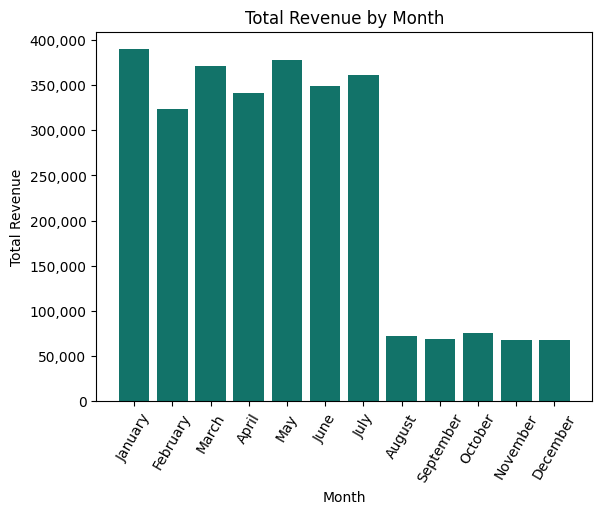

In [ ]:
#visualisazing sales trend over time
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.bar(monthly_revenue.index, monthly_revenue.values, color='#127369')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Month')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=60)
plt.show()

Finding:In 2024, Total revenue was high from January to July, peaking around January and remaining relatively strong through the mid-year. However, starting in August, there is a sharp and consistent drop in revenue that continues through December.

Task 3.3. Which quarter has the highest sales volume?

In [ ]:
#make the quarter column
df['Quarter']=df['transaction_date'].dt.quarter.astype(str)
df['Quarter']=df['Quarter'].map({
    '1':'Q1',
    '2':'Q2',
    '3':'Q3',
    '4':'Q4'
})
df.head()

,transaction_date,buyer_name,buyer_location,buyer_birthdate,buyer_age,payment_method,quantity_purchased,product_code,sales_representative,gender,brand_name,unit_price,cost,td_month,revenue,COGS,Profit,Quarter
0,2024-02-20,Allen Santos,San Jose,23/10/1954,69,Credit Card,129,Pro04,Travis Doyle,Male,Cinnamon Swirls,14,10,February,1806,1290,516,Q1
1,2024-03-15,Brenda Shaw,San Jose,05/05/1980,43,Cash,370,Pro09,Joseph Hill,Female,Shortbread,45,10,March,16650,3700,12950,Q1
2,2024-05-09,Alexander Smith,San Jose,16/09/1945,78,Debit Card,90,Pro05,Elizabeth Guerrero,Male,Ginger Snaps,28,14,May,2520,1260,1260,Q2
3,2024-05-20,Mary Rodriguez,Philadelphia,19/11/1953,70,Cash,475,Pro04,Tracy Lee,Female,Cinnamon Swirls,14,10,May,6650,4750,1900,Q2
4,2024-03-17,Clinton Haynes,San Antonio,03/03/2001,23,Cash,346,Pro01,Sara Robertson,Male,Butter Crunch,11,10,March,3806,3460,346,Q1


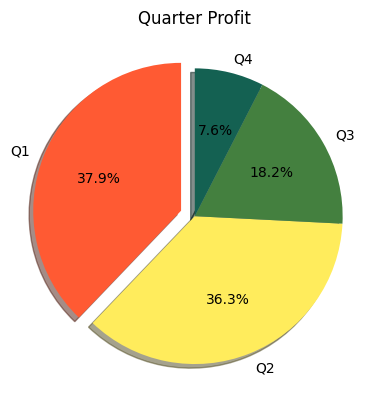

In [ ]:
#visualizing sales trend by quarter
import matplotlib.pyplot as plt

explode = (0.1, 0, 0,0)

df.groupby('Quarter')['Profit'].sum()
df_quarter=df.groupby('Quarter')['Profit'].sum()

fig, ax = plt.subplots()
ax.pie(df_quarter, explode=explode, labels=df_quarter.index, autopct='%1.1f%%', colors=['#FF5A33', '#FFEC5C', '#44803F', '#146152'],
       shadow=True, startangle=90)
ax.set_title('Quarter Profit')
plt.show()

finding: The highest revenue was recorded in the first quarter of 2024, and it gradually lowered through to the fourth quarter. A significant drop was observed between Q2 and Q3.

Task 3.4. Customer Insights: What is the gender distribution of buyers?

In [ ]:
gender_distribution=df.groupby('gender')['quantity_purchased'].sum()
gender_distribution

,quantity_purchased
gender,
Female,288435
Male,2578231


finding: The majority of purchases were made by male customers

Task 3.4. Which city have the highest number of transactions?

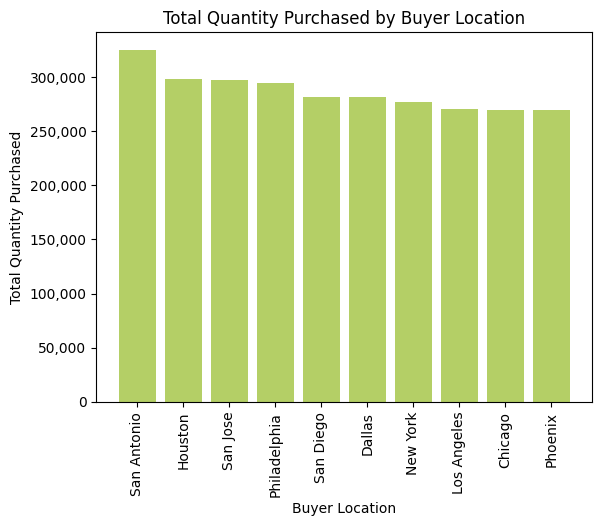

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

df_loc=df.groupby('buyer_location')['quantity_purchased'].sum()
df_loc=df_loc.sort_values(ascending=False)

plt.bar(df_loc.index, df_loc.values, color='#B4CF66')
plt.xlabel('Buyer Location')
plt.ylabel('Total Quantity Purchased')
plt.title('Total Quantity Purchased by Buyer Location')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=90)
plt.show()


finding: San Antonio recorded the highest total quantity purchased, followed closely by Houston and San Jose. Other cities such as Phoenix and Chicago had lower purchase volumes in comparison

Task 3.5. Product & Sales Performance: Which products or brands are the top sellers?


In [ ]:
top_brand=df.groupby('brand_name')['quantity_purchased'].sum()
top_brand=top_brand.sort_values(ascending=False)
top_brand

,quantity_purchased
brand_name,
Ginger Snaps,303400
Vanilla Wafers,300855
Peanut Butter Bites,295648
Butter Crunch,293033
Shortbread,290776
Choco Delight,282218
Caramel Biscuits,279697
Lemon Crisps,277911
Cinnamon Swirls,272218


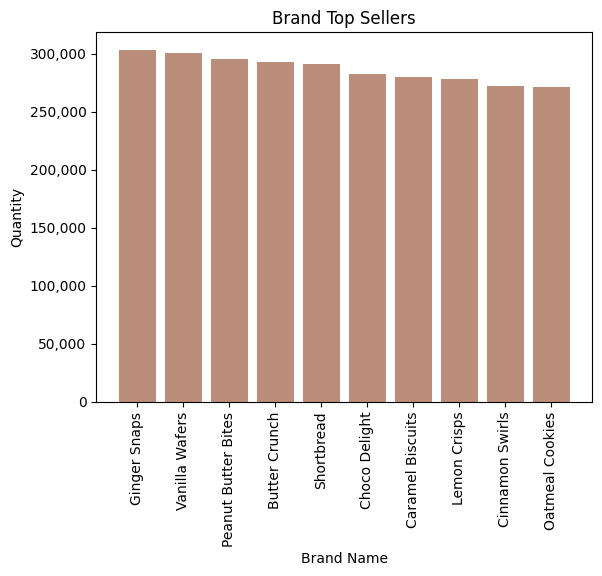

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.bar(top_brand.index, top_brand.values, color='#BA8E7A')
plt.xlabel('Brand Name')
plt.ylabel('Quantity')
plt.title('Brand Top Sellers')
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

Finding: Ginger Snaps had the highest quantity sold, followed closely by Vanilla Wafers and Peanut Butter Bites. On the other hand, Oatmeal Cookies and Cinnamon Swirls were among the least purchased products in the dataset.

Task 3.6. Sales Team Performance:Which sales representatives drive the most revenue?

In [ ]:
df_sales=df.groupby('sales_representative')['revenue'].sum()
df_sales

,revenue
sales_representative,
April Watkins,8652698
Elizabeth Guerrero,1475983
Joseph Hill,9981955
Katie Stanton,6566327
Sara Robertson,7237115
Susan Dean,8056570
Tracy Lee,5552540
Travis Doyle,10288216


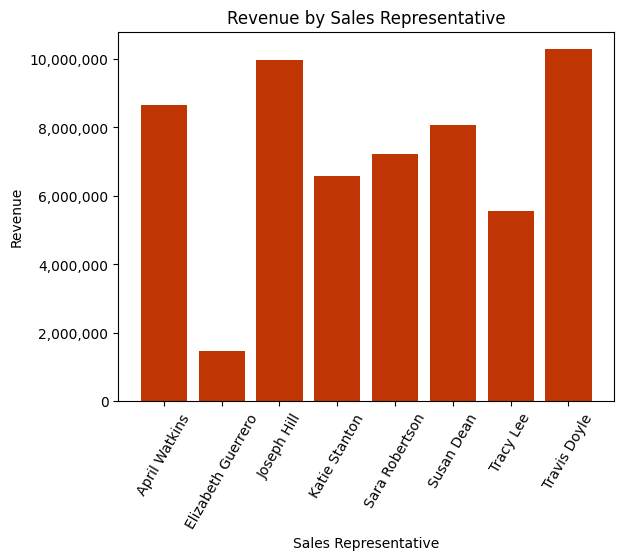

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.bar(df_sales.index, df_sales.values, color='#BF3604')
plt.xlabel('Sales Representative')
plt.ylabel('Revenue')
plt.title('Revenue by Sales Representative')
plt.xticks(rotation=60)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()

Task 3.7. What is the average sales amount per sales representative?

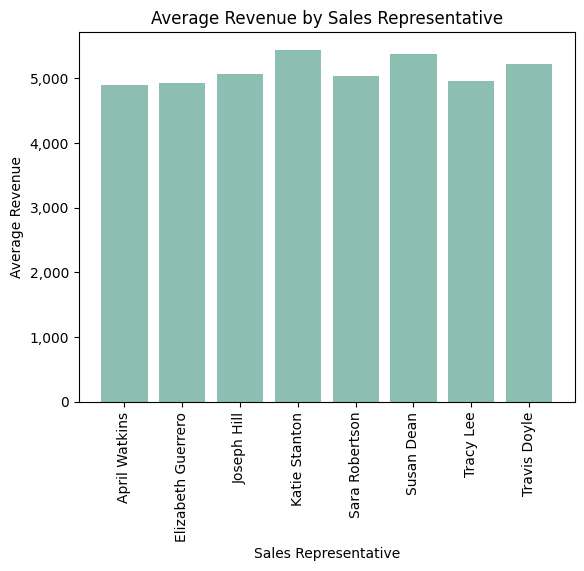

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

df_avg_sales=df.groupby('sales_representative')['revenue'].mean()

plt.bar(df_avg_sales.index, df_avg_sales.values, color='#8CBEB2')
plt.xlabel('Sales Representative')
plt.ylabel('Average Revenue')
plt.title('Average Revenue by Sales Representative')
plt.xticks(rotation=90)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
plt.show()